In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
 
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import friedmanchisquare
from scipy import stats
from sklearn.metrics import confusion_matrix
 
 
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical




Mounted at /content/gdrive


In [2]:
root_path = 'gdrive/My Drive/SelecaoAIBox/data/website_phishing/'

In [3]:
# loading the dataset from my gdrive
df = pd.read_csv(root_path + 'website_phishing.csv')

# Dataset Description

In [4]:
# Replacing the phishy class by the value 2
# I decided to use MLP so it would be better if
# the classes were all non negative values

df['Result'] = df['Result'].astype(str).replace('-1','2').astype(np.int64)

In [ ]:
# Visualizing the data
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [ ]:
# Visualizing the data
df.tail()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,2
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1
1352,1,0,1,1,1,0,-1,-1,0,2


In [ ]:
#  Calculating if there are null or na values in the dataset
print('Verifying null and na data')
print()
print(df.isna().any())

print()
print(df.isnull().any())


Verifying null and na data

SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool

SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool


In [ ]:
# Obtaining some additional information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


## EDA

In this section we are going to take a look at the dataset and try to get more information about the data already available.

### Class Distribution
Here we are going to see if the classes are balanced (if they are evenly distributed) or if there is some kind of skew towards one specific class.


In [ ]:
def process_data_class_distribution(df):
  class_names = ['Legitimate','Suspicious', 'Phishy']

  class_samples = [len(df[df['Result'] == 1]), len(df[df['Result'] == 0]), len(df[df['Result'] == 2])]


  data = {
      'Class': class_names,
      'Samples': class_samples,
  }
  
  df_class = pd.DataFrame(data)

  df_class.sort_values(by='Samples', ascending=True, inplace=True)

  return df_class

def fig_class_distribution(df):
  fig = go.Figure()

  for idx,classe in enumerate(list(df.Class.unique())):
    
    if idx == 0: # the class with less samples will be highlighted
      color = 'rgb(90, 90, 200)'

    else:
      color = 'rgb(120, 120, 120)'

    fig.add_trace(go.Bar(y=[classe], x=df[df['Class'] == classe]['Samples'], marker_color=color, name=classe, orientation='h'))

  return fig

def update_layout_bar_chart(fig):
  fig.update_layout(
        title= 'Class Distribution', 
        font=dict(
            family="Arial",
            size=16),
        plot_bgcolor="#FFFFFF",
        margin=dict(l=20, r=20, b=20, t=50),
        width=600,
        height=400,
            
        hoverlabel=dict(
            font_color= 'rgb(120, 120, 120)',
            bgcolor="white",
            font_size=16,
            font_family="Arial"
        ),
        xaxis=dict(
        
            showline=True,
            showgrid=False,
            showticklabels=True,
            linecolor='rgb(204, 204, 204)',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=16,
                color='rgb(82, 82, 82)',),
        ),

        yaxis=dict(
        
            showline=True,
            showgrid=False,
            gridcolor='rgb(204, 204, 204)',
            gridwidth=2, 
            showticklabels=True,
            linecolor='rgb(204, 204, 204)',
            linewidth=2,
            ticks=None,
            tickfont=dict(
                family='Arial',
                size=16,
                color='rgb(82, 82, 82)',
            ),

    ))
  fig.update_layout(showlegend=False)
  fig.update_layout(yaxis_title='Class') 
  fig.update_layout(xaxis_title ='Number of Samples')

def plot_class_distribution(df):

  df_class = process_data_class_distribution(df)
  fig = fig_class_distribution(df_class)

  update_layout_bar_chart(fig)

  fig.show()
  

In [ ]:
plot_class_distribution(df)

From the chart above showing the class distribution we can see that there is a class imbalance, as most of the samples are either phishy or legitimate, with only a 103 samples from the suspicious class.

### Features Correlation

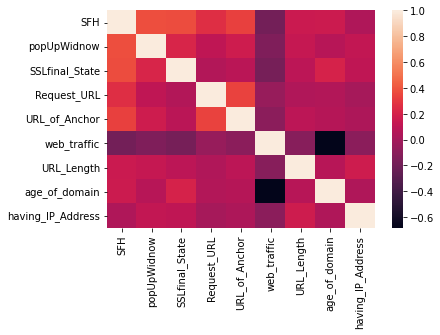

In [5]:
features = ['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',]
df_corr = df.loc[:, features].corr()

sns.heatmap(df_corr)
plt.show()

The correlation chart can be usefult to highlight correlation between different features, and further avoid using both the correlated features as they don't add much different information to the problem.

Here we can see that most of the features share a redish color which indicates a light correlation but only the main diagonal has the most light colors (that indicate high correlation). With a more detailed analysis of the correlation matrix we can see that there are no features with correlation greater than 0.9. So in this case, based on the correlation analysis we will keep all of the features for now.

Some highlights from the correlation plot:

* There are two features that are negatively correlated, being "Age of domain" and "Web traffic", so that implies that the greater the number of accesses in a website, the more recent is its domain. From the dataset paper, we have that phishy websites have less than a year of existence, and legitimate websites usually have a low web traffic, meaning that if there is a high traffic in a website it might indicate that the website is recent and chances are it is a phishy one.



### Feature Importance

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
X = df.drop(['Result' ], axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train.values)


importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [7]:
phishy_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[2]
})
phishy_importances = phishy_importances.sort_values(by='Importance', ascending=False)
phishy_importances

,Attribute,Importance
0,SFH,1.060652
1,popUpWidnow,1.007677
3,Request_URL,0.827381
2,SSLfinal_State,0.617686
4,URL_of_Anchor,0.297008
7,age_of_domain,0.095912
5,web_traffic,-0.008352
8,having_IP_Address,-0.142051
6,URL_Length,-0.326531


In [11]:
legit_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[1]
})
legit_importances = legit_importances.sort_values(by='Importance', ascending=False)
legit_importances

,Attribute,Importance
6,URL_Length,0.778874
2,SSLfinal_State,0.262863
1,popUpWidnow,0.173298
7,age_of_domain,0.173058
5,web_traffic,-0.113255
4,URL_of_Anchor,-0.220480
0,SFH,-0.294394
8,having_IP_Address,-0.425399
3,Request_URL,-1.096999


In [12]:

susp_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
susp_importances = susp_importances.sort_values(by='Importance', ascending=False)
susp_importances

,Attribute,Importance
0,SFH,1.060652
1,popUpWidnow,1.007677
3,Request_URL,0.827381
2,SSLfinal_State,0.617686
4,URL_of_Anchor,0.297008
7,age_of_domain,0.095912
5,web_traffic,-0.008352
8,having_IP_Address,-0.142051
6,URL_Length,-0.326531


### PCA


In [8]:
from sklearn.decomposition import PCA

x = df.loc[:, features].values
pca_model = PCA(n_components=2)
principalComponents_breast = pca_model.fit_transform(x)

principal_df = pd.DataFrame(data = principalComponents_breast
             , columns = ['Principal component 1', 'Principal component 2'])

In [ ]:
df_pca = pd.concat([df, principal_df], axis=1)


In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_pca[df_pca['Result'] == 0]['Principal component 1'], y=df_pca[df_pca['Result'] == 0]['Principal component 2'],name='Suspicious', mode='markers',  marker_color='#ffdd00'))
fig.add_trace(go.Scatter(x=df_pca[df_pca['Result'] == 2]['Principal component 1'], y=df_pca[df_pca['Result'] == 2]['Principal component 2'],name='Phishy', mode='markers', marker_color='#d30d0d'))
fig.add_trace(go.Scatter(x=df_pca[df_pca['Result'] == 1]['Principal component 1'], y=df_pca[df_pca['Result'] == 1]['Principal component 2'],name='Legitimate', mode='markers', marker_color='#55a630'))


fig.update_layout(
      title= 'Samples per class by Principal Component Analysis', 
      font=dict(
          family="Arial",
          size=16),
      plot_bgcolor="#FFFFFF",
      margin=dict(l=20, r=20, b=20, t=50),
      width=600,
      height=400,
          
      hoverlabel=dict(
          font_color= 'rgb(120, 120, 120)',
          bgcolor="white",
          font_size=16,
          font_family="Arial"
      ),
      xaxis=dict(
      
          showline=True,
          showgrid=False,
          showticklabels=True,
          linecolor='rgb(204, 204, 204)',
          linewidth=2,
          ticks='outside',
          tickfont=dict(
              family='Arial',
              size=16,
              color='rgb(82, 82, 82)',),
      ),

      yaxis=dict(
      
          showline=True,
          showgrid=False,
          gridcolor='rgb(204, 204, 204)',
          gridwidth=2, 
          showticklabels=True,
          linecolor='rgb(204, 204, 204)',
          linewidth=2,
          ticks=None,
          tickfont=dict(
              family='Arial',
              size=16,
              color='rgb(82, 82, 82)',
          ),

  ))
fig.update_layout(showlegend=True)
fig.update_layout(yaxis_title='Principal Component 2') 
fig.update_layout(xaxis_title ='Principal Component 1')
fig.show()




In [28]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3,subplot_titles=( "Phishy - PCA","Suspicious - PCA ", "Legitimate - PCA"), start_cell="bottom-left")


fig.add_trace(go.Scatter(x=df_pca[df_pca['Result'] == 2]['Principal component 1'], y=df_pca[df_pca['Result'] == 2]['Principal component 2'],name='Phishy', mode='markers', marker_color='#d30d0d'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_pca[df_pca['Result'] == 0]['Principal component 1'], y=df_pca[df_pca['Result'] == 0]['Principal component 2'],name='Suspicious', mode='markers',  marker_color='#ffdd00'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_pca[df_pca['Result'] == 1]['Principal component 1'], y=df_pca[df_pca['Result'] == 1]['Principal component 2'],name='Legitimate', mode='markers', marker_color='#55a630'), row=1, col=3)

fig.update_xaxes(range=[-3, 3])
fig.update_yaxes(range=[-3, 3])
fig.update_layout(height=400, width=1050, template='plotly_white')

fig.show()

From the plot above we can see an interesting pattern in the suspicious class. While the samples from this class are slightly shifted to the right when compared to the phishy ones, they are slightly shifted to the left compared to the legitimate class. That behavior makes the samples from the suspicious class even harder to distinguish between the two main classes. Because we can't define to what classes these samples actually belong, and because they are in less number, in the first part of this analysis we are going to ignore those samples, and consider the problem of binary classification between phishy and non-phishy (legitimate).



Here are the worst case scenarios:

* Legitimate website classified as Phishy: In this case some legitimate website, could be interpreted as malicious. Imagine a website from a recently created store that decided to make an opening sale, and because the company is new itself its website is also new, so the age of the domain must be less than a yer (which is a sign of phishy websites). Their opening sale ended up being very effective and a lot of new customers visited the website to purchase items with discount. And that combination of high traffic and recent domain, is also particular to phishy websites. The worst that could happen to that company would be the potential loss of new customers due to their phishy-like website, but as the company keeps growing its customer based because of the quality of their product and their phisical stores, that initial hike in the traffic could change and as the age of the domain increases with time, after a year the company would no longer be classified as phishy.

* Phishy website classified as Legitimate: In that case the outcome is the wors possible, because phishy websites are malicious websites that try in some way to fool the user posing as a legitimate site, but in the end they are only trying to take advantage from them, either by installing malicious software or by stealing sensitive data. When a Phishy website is misclassified the drawbacks are much problematic than the other case. 

In [ ]:
# function to plot the class distribution by feature

def plot_class_distribution(feature, color, data, labels):

  class_info = data[feature].value_counts().sort_index()
  
  #x = class_info.index
  x = labels
  x_pos = [i for i, _ in enumerate(x)]

  y = class_info.values


  fig, ax = plt.subplots()
  rects1 = ax.bar(x_pos, y, color=color)
  # helper function to show the number of examples in each bar
  def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.f' % float(height),
        ha='center', va='bottom')
  autolabel(rects1)


  plt.ylabel("Number of Examples")
  plt.title(feature + " examples distribution\n")
  plt.xticks(x_pos, x)



### Distribution of the values in each feature

The columns in the dataframe represent different features related to phishing. The values associated with each one of the columns are detailed in the [article](https://www.sciencedirect.com/science/article/abs/pii/S0957417414001481) associated with its Kaggle database, and they are described below:

1.   SFH - Server Form Handler After the information is send the website sends them to a server to process the data. Phishy websites usually let the SFH field blank or redirects to another domain.
2.   Pop up Window -  Legitimate websites don't use pop up windows to validate users' information. 
3.   SSL final state - Reliable webpages use the HTTP protocol, on the other hand malicious websites may use a fake HTTP procotol or not use it at all.
4.   Request URL - Malicious websites usually load the page content from a different URL than the original website URL.
5.   URL of anchor - Malicious websites usually have links that point to different webpages.
6.   Web traffic - Legitimate websites usually have a lower number of visits than the malicious ones.  **
7.   URL length - URLs with length bigger than 75 characters  are considered features from phishy websites.
8.   Age of domain - Websites with less than a year of existece are considered suspicious **
9.   Having IP Address - The presence of IP address in the website URL is associated with malicious websites.

** Some of the features were defined in a differet way in the description of the features from the article than the logical rules in it, in these cases I considered the description instead of the logical rule.







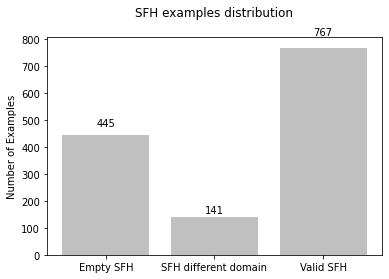

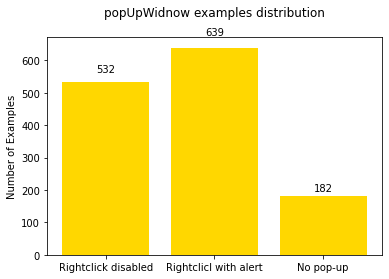

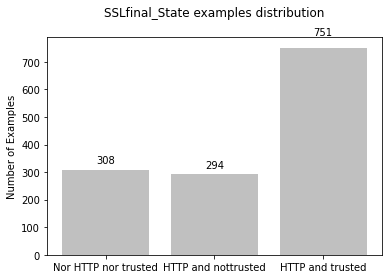

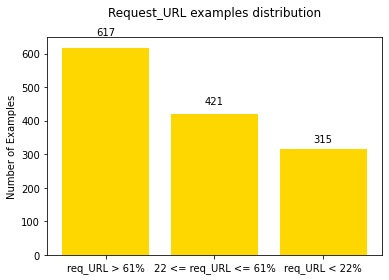

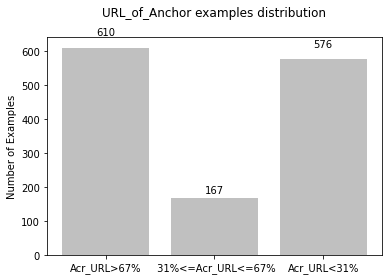

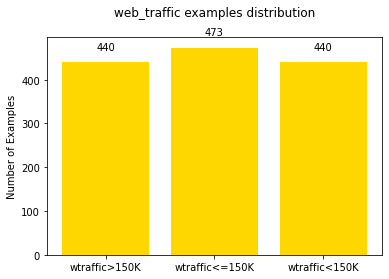

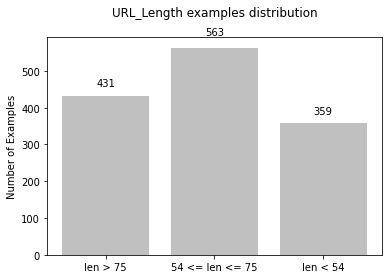

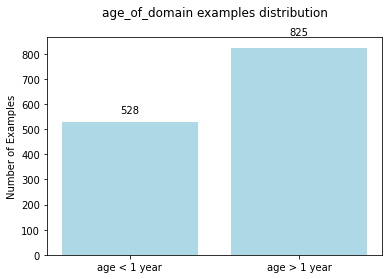

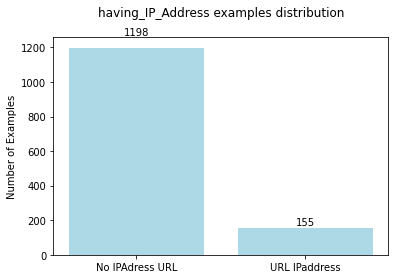

In [ ]:
# Distribution of the column values according to the description from the paper


sfh_labels = ['Empty SFH', 'SFH different domain', 'Valid SFH']
plot_class_distribution('SFH', 'silver', df, sfh_labels)

pop_labels = ['Rightclick disabled', 'Rightclicl with alert', 'No pop-up']
plot_class_distribution('popUpWidnow', 'gold', df, pop_labels)

ssl_labels = ['Nor HTTP nor trusted', 'HTTP and nottrusted', 'HTTP and trusted']
plot_class_distribution('SSLfinal_State', 'silver', df, ssl_labels)

request_labels = ['req_URL > 61%',  '22 <= req_URL <= 61%', 'req_URL < 22%']
plot_class_distribution('Request_URL', 'gold', df, request_labels)

anchor_labels = [ 'Acr_URL>67%',' 31%<=Acr_URL<=67%', 'Acr_URL<31%']
plot_class_distribution('URL_of_Anchor', 'silver',df, anchor_labels)

web_labels = ['wtraffic>150K', 'wtraffic<=150K', 'wtraffic<150K']
plot_class_distribution('web_traffic', 'gold', df, web_labels)

url_labels = ['len > 75', '54 <= len <= 75', 'len < 54']
plot_class_distribution('URL_Length', 'silver', df, url_labels)

age_labels = ['age < 1 year', 'age > 1 year']
plot_class_distribution('age_of_domain', 'lightblue', df, age_labels)

ip_labels = ['No IPAdress URL','URL IPaddress']
plot_class_distribution('having_IP_Address', 'lightblue', df, ip_labels)


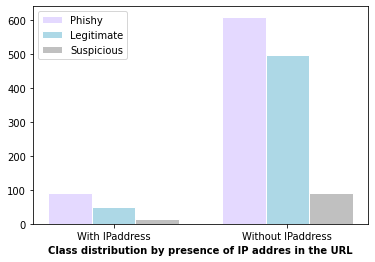

In [ ]:
# Graph grouping the presence of IP address with the classes
 
dfip = df[df['having_IP_Address'] == 1]
dfnoip = df[df['having_IP_Address'] == 0]
 
labelsip = dfip['Result'].value_counts().index
valuesip = dfip['Result'].value_counts().values
 
labelsnoip = dfnoip['Result'].value_counts().index
valuesnoip = dfnoip['Result'].value_counts().values
 
 
barWidth = 0.25
 
bars1 = [ valuesip[0], valuesnoip[0]]
bars2 = [valuesip[1], valuesnoip[1]]
bars3 = [valuesip[2], valuesnoip[2]]
 
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#E4D9FF', width=barWidth, edgecolor='white', label='Phishy')
plt.bar(r2, bars2, color='lightblue', width=barWidth, edgecolor='white', label='Legitimate')
plt.bar(r3, bars3, color='silver', width=barWidth, edgecolor='white', label='Suspicious')
 
# Add xticks on the middle of the group bars
plt.xlabel('Class distribution by presence of IP addres in the URL', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],['With IPaddress', 'Without IPaddress'] )
 
 
plt.legend()
plt.show()

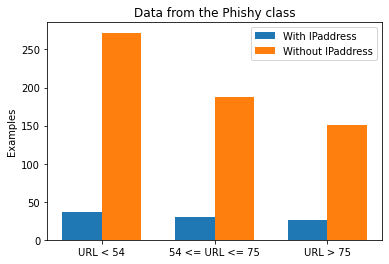

In [ ]:
# Graph with the relation between the Phishy class and the feature having IP address, and 
# URL length
dfphishy = df[df['Result'] == 2]

dfphishy_ip = dfphishy[dfphishy['having_IP_Address'] == 1]
dfphishy_noip = dfphishy[dfphishy['having_IP_Address'] == 0]


ip_values_url1_phis = list(dfphishy_ip['URL_Length'].value_counts().values)
noip_values_url1_phis = list(dfphishy_noip['URL_Length'].value_counts().values)

labels = ['URL < 54', '54 <= URL <= 75', 'URL > 75']
noip = noip_values_url1_phis
ip = ip_values_url1_phis

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ip, width, label='With IPaddress')
rects2 = ax.bar(x + width/2, noip, width, label='Without IPaddress')


ax.set_ylabel('Examples')
ax.set_title('Data from the Phishy class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


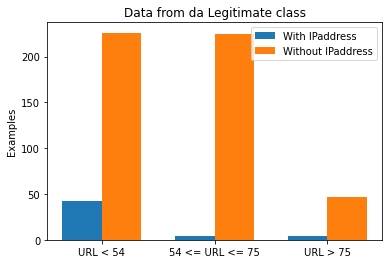

In [ ]:
dflegitimate = df[df['Result'] == 1]

dflegit_ip = dflegitimate[dflegitimate['having_IP_Address'] == 1]
dflegit_noip = dflegitimate[dflegitimate['having_IP_Address'] == 0]


ip_values_url1_legit = list(dflegit_ip['URL_Length'].value_counts().values)
noip_values_url1_legit = list(dflegit_noip['URL_Length'].value_counts().values)
#ip_values_url1_legit.append(0)

labels = ['URL < 54', '54 <= URL <= 75', 'URL > 75']
noip = noip_values_url1_legit
ip = ip_values_url1_legit

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ip, width, label='With IPaddress')
rects2 = ax.bar(x + width/2, noip, width, label='Without IPaddress')


ax.set_ylabel('Examples')
ax.set_title('Data from da Legitimate class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


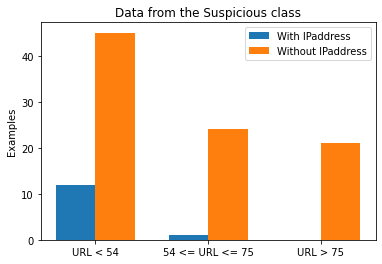

In [ ]:
dfsuspicious = df[df['Result'] == 0]

dfsusp_ip = dfsuspicious[dfsuspicious['having_IP_Address'] == 1]
dfsusp_noip = dfsuspicious[dfsuspicious['having_IP_Address'] == 0]


ip_values_url1_susp = list(dfsusp_ip['URL_Length'].value_counts().values)
noip_values_url1_susp = list(dfsusp_noip['URL_Length'].value_counts().values)
ip_values_url1_susp.append(0)

labels = ['URL < 54', '54 <= URL <= 75', 'URL > 75']
noip = noip_values_url1_susp
ip = ip_values_url1_susp

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ip, width, label='With IPaddress')
rects2 = ax.bar(x + width/2, noip, width, label='Without IPaddress')


ax.set_ylabel('Examples')
ax.set_title('Data from the Suspicious class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()




# Data Classification


## Helper Functions

In [8]:
from sklearn.ensemble import AdaBoostClassifier
import tensorflow
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [9]:
def initialize_classifiers():

  adab = AdaBoostClassifier(n_estimators=100)

  # Support Vector Machine - função de kernel RBF
  svmRBF = SVC(kernel='rbf')
 
  # Random Forest
  randomForest = RandomForestClassifier()
 
  # Logistic Regression
  logisticRegression = LogisticRegression()
 
  # MLP 
  modelo = Sequential()
  modelo.add(Dense(units=64, activation='relu',kernel_initializer='random_uniform', input_dim=5))
  modelo.add(Dense(units=32, activation='relu',kernel_initializer='random_uniform'))
  modelo.add(Dense(units=16, activation='relu',kernel_initializer='random_uniform'))
  modelo.add(Dense(units=2, activation='sigmoid'))
 
  optimizer = tensorflow.keras.optimizers.Adam(lr = 0.001, decay =0.0001, clipvalue= 0.5)
  modelo.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  return [adab, svmRBF, randomForest, logisticRegression, modelo]


def train_and_evaluate(class_train, noclass_train, class_test, noclass_test, alg, dicio, epochs = 400, batch_size = 64, verb = False):
 
  if dicio['modelname'] == 'MLP':
    
    class_train_categorical = keras.utils.np_utils.to_categorical(class_train, num_classes=0)
    class_test_categorical = keras.utils.np_utils.to_categorical(class_test, num_classes=0)
    tempo_inicial = time.time()
    alg.fit(noclass_train, class_train_categorical,batch_size=batch_size, epochs=epochs, verbose= verb)
    tempo_fim = time.time()
    predicted = [np.argmax(pred) for pred in alg.predict(noclass_test)]
 
  else:
    tempo_inicial = time.time()
    alg.fit(noclass_train, class_train)
    tempo_fim = time.time()
 
    predicted = alg.predict(noclass_test)
 
  dicio['acc'].append(accuracy_score(class_test, predicted))
  dicio['fscore'].append(f1_score(class_test, predicted, average='macro'))
  dicio['precision'].append(precision_score(class_test, predicted, average='macro'))
  dicio['recall'].append(recall_score(class_test, predicted, average='macro'))
  dicio['tempo'].append(tempo_fim - tempo_inicial)
  dicio['cm'].append(confusion_matrix(class_test,predicted))
 
# Creating dictionaies to store the metric data to each one of the classifiers
 
def create_dictios():
  adab_dc =  {'modelname':'ADA-B','acc': [], 'fscore': [], 'precision': [], 'recall': [] , 'tempo':[], 'cm': []}
  svmRBF_dc = {'modelname':'SVMR','acc': [], 'fscore': [], 'precision': [], 'recall': [] , 'tempo':[], 'cm': []}
  randomForest_dc = {'modelname':'RF','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  logreg_dc = {'modelname':'LR','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  mlp_dc = {'modelname':'MLP','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
 
  return [adab_dc, svmRBF_dc, randomForest_dc, logreg_dc, mlp_dc]
 
 
######## Data visualization functions ##########
 
# Creating boxplot with the data from a metric
 
def create_boxplot(df, metric_name):
  df.boxplot(column= list(df.columns) , figsize=(12, 8))
  plt.xlabel('Algorithms')
  plt.ylabel(metric_name)
  plt.show()
 
  print()
  print()
  print()
 
# Creating the statistic test to a pair of classifiers
 
def create_statistic_test(measure, df):
 
  two_bests = list(df.mean().sort_values(ascending = False).index[:2])
  best = df[two_bests[0]].values
  secondbest = df[two_bests[1]].values
 
  pvalue = stats.ttest_ind(best, secondbest)
  if pvalue[1] < 0.05:
    print('The algorithms '+ two_bests[0] + ' and ' + two_bests[1] + ' are statistically different using the metric ' + measure)
    print('P-value: ' + str(pvalue[1]))
  else:
    print('The algorithms '+ two_bests[0] + ' and ' + two_bests[1] + ' are  NOT statistically different using the metric '  + measure)
    print('P-value: ' + str(pvalue[1]))



## Training the classifiers

In [10]:
df_binary = df[df['Result'] != 0]
df_binary

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,2
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


In [ ]:
df_binary['Result'] = [0 if x == 2 else 1 for x in df_binary['Result']]


In [12]:
# Splitting the data into the features and classes
important_features = list(phishy_importances['Attribute'].values[:5])

df_noclass = df_binary.loc[:, important_features]

df_class = df_binary.loc[:, 'Result']

In [13]:
# Classification with k-fold cross validation

# Initializing the classifiers
listmodels = initialize_classifiers()

# Creating the dictionaries that will store the classifiers' results 
listofdicts = create_dictios()

# Initializing the K-fold
kfold = StratifiedKFold(10, shuffle=True, random_state=1)

c = kfold.split(df_noclass, df_class)

for train_index, test_index in c:

  noclass_train, noclass_test =np.array(df_noclass.iloc[train_index]) ,np.array(df_noclass.iloc[test_index])
  class_train, class_test = np.array(df_class.iloc[train_index]), np.array(df_class.iloc[test_index])

  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[0], listofdicts[0])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[1], listofdicts[1])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[2], listofdicts[2])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[3], listofdicts[3])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[4] , listofdicts[4], epochs = 400, batch_size = 64, verb = True)


# creating the dataframes that will store the evaluation metrics results

df_acc = pd.DataFrame(np.array([dic['acc'] for dic in listofdicts]).T, columns= [dic['modelname'] for dic in listofdicts])

df_fscore = pd.DataFrame(np.array([dic['fscore'] for dic in listofdicts]).T, columns=[dic['modelname'] for dic in listofdicts])

df_recall = pd.DataFrame(np.array([dic['recall'] for dic in listofdicts]).T, columns=[dic['modelname'] for dic in listofdicts])

df_precision = pd.DataFrame(np.array([dic['precision'] for dic in listofdicts]).T, columns=[dic['modelname'] for dic in listofdicts])

df_time = pd.DataFrame(np.array([dic['tempo'] for dic in listofdicts]).T, columns=[dic['modelname'] for dic in listofdicts])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


A saída de streaming foi truncada nas últimas 5000 linhas.
18/18 [==============================] - 0s 5ms/step - loss: 0.1444 - accuracy: 0.9387
Epoch 302/400
18/18 [==============================] - 0s 5ms/step - loss: 0.1438 - accuracy: 0.9387
Epoch 303/400
18/18 [==============================] - 0s 4ms/step - loss: 0.1447 - accuracy: 0.9396
Epoch 304/400
18/18 [==============================] - 0s 4ms/step - loss: 0.1439 - accuracy: 0.9396
Epoch 305/400
18/18 [==============================] - 0s 5ms/step - loss: 0.1442 - accuracy: 0.9396
Epoch 306/400
18/18 [==============================] - 0s 4ms/step - loss: 0.1455 - accuracy: 0.9378
Epoch 307/400
18/18 [==============================] - 0s 6ms/step - loss: 0.1443 - accuracy: 0.9378
Epoch 308/400
18/18 [==============================] - 0s 4ms/step - loss: 0.1437 - accuracy: 0.9387
Epoch 309/400
18/18 [==============================] - 0s 4ms/step - loss: 0.1441 - accuracy: 0.9369
Epoch 310/400
18/18 [=========================

In [14]:
df_time

,ADA-B,SVMR,RF,LR,MLP
0,0.319139,0.048671,0.359792,0.018865,42.674394
1,0.158533,0.015096,0.165246,0.004720,40.999539
2,0.174068,0.014914,0.142442,0.004242,41.002012
3,0.160029,0.014263,0.140510,0.004014,36.213558
4,0.231746,0.023303,0.216949,0.006693,37.083453
5,0.245627,0.024680,0.218839,0.006898,41.019674
6,0.236269,0.025806,0.222030,0.006859,41.021024
7,0.239302,0.024964,0.223936,0.006323,35.692364
8,0.301597,0.022902,0.236576,0.006401,41.017019
9,0.261853,0.023399,0.229213,0.006310,41.009772


In [22]:
import plotly.graph_objects as go
import numpy as np



def plot_boxplot(df, title):
    
  fig = go.Figure()
  # Use x instead of y argument for horizontal plot
  fig.add_trace(go.Box(x=df['ADA-B'], name='ADA Boost', marker_color='gray'))
  fig.add_trace(go.Box(x=df['SVMR'], name = 'SVM RBF',  marker_color='gray'))
  fig.add_trace(go.Box(x=df['RF'], name= 'Random Forest',  marker_color='gray'))
  fig.add_trace(go.Box(x=df['LR'], name= 'Logistic Regression',  marker_color='gray'))
  fig.add_trace(go.Box(x=df['MLP'], name='MLP',  marker_color='gray'))

  fig.update_layout(title=title)
  fig.update_layout(template='plotly_white')

  fig.show()

plot_boxplot(df_time, 'Time')
plot_boxplot(df_acc, 'Accuracy')
plot_boxplot(df_precision, 'Precision')
plot_boxplot(df_fscore, 'Fscore')
plot_boxplot(df_recall, 'Recall')



###Classifiers' Analysis

#### Time
* The faster algorithm was the Support Vector Machine with the RBF function, and the slowest was the MLP. Because of its complexity compared to the other tested algorithms it wasn't a surprise that the MLP got the greatest prediction time, but comparing the other algorithms their prediction times weren't so different.

### Accuracy
* The accuracy measures the total of correct predictions (both on the phishy class and on the legitimate class). Regarding that metric we can split the classifiers between two groups, the ones that achieved median accuracy greater than 92% and the ones that didn't. The best performing ones were the MLP and SVM RBF.

### Precision 
* Considering that our classification problem aims to minimize the False Positives (the phishy websites misclassified as legitimate), the precision metric is the most appropriate one to evaluate this kind of problem. In this case only the SVM RBF achieved median with more than 92% of precision, and the MLP achieved the median of 91%.


Considering that we have more computational power to further improve our MLP model and be able to train it properly, that could be the classifier choice for this problem. But due to the time taken to complete the predictions, if we don't have enough time to train a MLP, we can use the SVM with the RBF function, that also achieved reasonably good results on the Precision metric without the training time drawback from the MLP.


## Statistic Test

In [19]:
# Making the statistic test to each one of the evaluation metrics
create_statistic_test('f1-score', df_fscore)
print()

create_statistic_test('recall', df_recall)
print()

create_statistic_test('precision', df_precision)
print()

create_statistic_test('accuracy', df_acc)


The algorithms SVMR and MLP are  NOT statistically different using the metric f1-score
P-value: 0.755963763197188

The algorithms SVMR and MLP are  NOT statistically different using the metric recall
P-value: 0.889982318135174

The algorithms SVMR and RF are  NOT statistically different using the metric precision
P-value: 0.6927938016465758

The algorithms SVMR and RF are  NOT statistically different using the metric accuracy
P-value: 0.700400372547293
